In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv('FireData.csv')
ds

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
0,190306,81 - Engine Area,NaN,NaN,0,0,1000.0,NaN,NaN,2015-08-29T11:52:31,...,NaN,NaN,NaN,NaN,NaN,NaN,3 - Fire with smoke showing only - including v...,2015-08-29T11:52:04,2015-08-29T11:52:19,0
1,190307,22 - Sleeping Area or Bedroom (inc. patients r...,01 - Normal (no change),8 - Not applicable (not a business),0,0,20.0,0.0,NaN,2017-07-02T21:39:00,...,98 - Not applicable: Alarm operated OR presenc...,9 - Type undetermined,7 - Not applicable: Occupant(s) first alerted ...,2 - Confined to part of room/area of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,1 - Fire extinguished prior to arrival,2017-07-02T21:33:06,2017-07-02T21:35:59,0
2,190308,81 - Engine Area,NaN,NaN,0,0,5000.0,NaN,NaN,2015-02-13T18:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,4 - Flames showing from small area (one storey...,2015-02-13T18:44:29,2015-02-13T18:45:35,0
3,190309,99 - Undetermined (formerly 98),NaN,NaN,0,0,7500.0,NaN,NaN,2015-02-14T20:16:25,...,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, ...",2015-02-14T20:10:16,2015-02-14T20:13:03,0
4,190310,81 - Engine Area,NaN,NaN,0,0,10000.0,NaN,NaN,2014-05-25T23:50:52,...,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, ...",2014-05-25T23:44:10,2014-05-25T23:49:51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12682,202988,81 - Engine Area,NaN,NaN,0,0,500.0,NaN,NaN,2013-06-04T13:02:34,...,NaN,NaN,NaN,NaN,NaN,NaN,1 - Fire extinguished prior to arrival,2013-06-04T12:57:29,2013-06-04T13:01:27,0
12683,202989,81 - Engine Area,NaN,NaN,0,0,40000.0,NaN,NaN,2017-08-20T21:08:44,...,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, ...",2017-08-20T20:59:03,2017-08-20T21:06:17,0
12684,202990,27 - Laundry Area,01 - Normal (no change),1 - No business interruption,0,0,2000.0,0.0,NaN,2017-10-06T14:55:46,...,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,1 - All persons (at risk of injury) self evacu...,2 - Confined to part of room/area of origin,2 - Did not activate: remote from fire,2 - Partial sprinkler system present,2 - Fire with no evidence from street,2017-10-06T14:50:08,2017-10-06T14:53:48,0
12685,202991,"21 - Living Area (e.g. living, TV, recreation,...",01 - Normal (no change),8 - Not applicable (not a business),1,0,25.0,0.0,NaN,2015-04-04T16:38:00,...,1 - No battery,1 - Battery operated,7 - Not applicable: Occupant(s) first alerted ...,"7 - Spread to other floors, confined to building",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,1 - Fire extinguished prior to arrival,2015-04-04T16:33:53,2015-04-04T16:37:04,0


In [3]:
ds.isnull().sum()

_id                                                                  0
Area_of_Origin                                                       0
Building_Status                                                   3482
Business_Impact                                                   3484
Civilian_Casualties                                                  0
Count_of_Persons_Rescued                                             0
Estimated_Dollar_Loss                                                1
Estimated_Number_Of_Persons_Displaced                             3483
Exposures                                                        12408
Ext_agent_app_or_defer_time                                          0
Extent_Of_Fire                                                    3484
Final_Incident_Type                                                  0
Fire_Alarm_System_Impact_on_Evacuation                            3484
Fire_Alarm_System_Operation                                       3484
Fire_A

In [4]:
ds.shape

(12687, 43)

<AxesSubplot:>

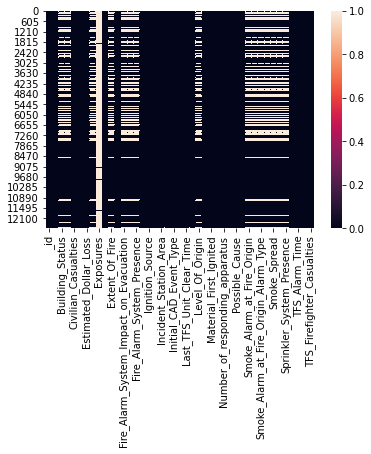

In [5]:
sns.heatmap(ds.isnull())

In [6]:
ds.dropna(subset=['Building_Status'], inplace = True)

In [7]:
ds.isnull().sum()

_id                                                                 0
Area_of_Origin                                                      0
Building_Status                                                     0
Business_Impact                                                     2
Civilian_Casualties                                                 0
Count_of_Persons_Rescued                                            0
Estimated_Dollar_Loss                                               0
Estimated_Number_Of_Persons_Displaced                               1
Exposures                                                        8994
Ext_agent_app_or_defer_time                                         0
Extent_Of_Fire                                                      2
Final_Incident_Type                                                 0
Fire_Alarm_System_Impact_on_Evacuation                              2
Fire_Alarm_System_Operation                                         2
Fire_Alarm_System_Pr

In [8]:
ds['Exposures'].unique()

array([nan,  1.,  3.,  2.,  4.,  6.,  5.,  7.])

In [9]:
Exposures1 = ds.iloc[:,8:9].values
Exposures2 = ds.iloc[:,8:9].values
Exposures3 = ds.iloc[:,8:9].values
Exposures1

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [10]:
from sklearn.impute import SimpleImputer
si1 = SimpleImputer(missing_values=np.nan,strategy='mean')
si1.fit(Exposures1)
Exposures1 = si1.transform(Exposures1)
Exposures1 = pd.DataFrame(Exposures1, columns=['Exposures1'])
Exposures1

,Exposures1
0,1.649289
1,1.649289
2,1.649289
3,1.649289
4,1.649289
...,...
9200,1.649289
9201,1.649289
9202,1.649289
9203,1.649289


In [11]:
si2 = SimpleImputer(missing_values=np.nan,strategy='median')
si2.fit(Exposures2)
Exposures2 = si2.transform(Exposures2)
Exposures2 = pd.DataFrame(Exposures2, columns=['Exposures2'])
Exposures2

,Exposures2
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
9200,1.0
9201,1.0
9202,1.0
9203,1.0


In [12]:
ds.isnull().sum()

_id                                                                 0
Area_of_Origin                                                      0
Building_Status                                                     0
Business_Impact                                                     2
Civilian_Casualties                                                 0
Count_of_Persons_Rescued                                            0
Estimated_Dollar_Loss                                               0
Estimated_Number_Of_Persons_Displaced                               1
Exposures                                                        8994
Ext_agent_app_or_defer_time                                         0
Extent_Of_Fire                                                      2
Final_Incident_Type                                                 0
Fire_Alarm_System_Impact_on_Evacuation                              2
Fire_Alarm_System_Operation                                         2
Fire_Alarm_System_Pr

In [13]:
ds.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)

_id                                                              0
Area_of_Origin                                                   0
Building_Status                                                  0
Business_Impact                                                  0
Civilian_Casualties                                              0
Count_of_Persons_Rescued                                         0
Estimated_Dollar_Loss                                            0
Estimated_Number_Of_Persons_Displaced                            0
Exposures                                                        0
Ext_agent_app_or_defer_time                                      0
Extent_Of_Fire                                                   0
Final_Incident_Type                                              0
Fire_Alarm_System_Impact_on_Evacuation                           0
Fire_Alarm_System_Operation                                      0
Fire_Alarm_System_Presence                                    

<AxesSubplot:>

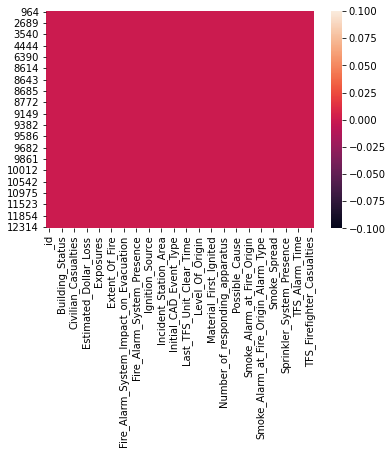

In [14]:
sns.heatmap(ds.isnull())

In [15]:
ds = ds.reset_index()

,index,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
0,964,191270,53 - Chimney/Flue Pipe,02 - Under Renovation,1 - No business interruption,0,0,2000.0,0.0,1.0,...,3 - Electrical line or battery not connected,8 - Not applicable - no smoke alarm or presenc...,"8 - Not applicable: No alarm, no persons present",2 - Confined to part of room/area of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2011-01-20T18:48:55,2011-01-20T18:53:28,0
1,1049,191355,"12 - Hallway, Corridor",01 - Normal (no change),1 - No business interruption,0,0,200.0,1.0,1.0,...,98 - Not applicable: Alarm operated OR presenc...,4 - Interconnected,2 - Some persons (at risk) self evacuated as a...,10 - Spread beyond building of origin,2 - Did not activate: remote from fire,1 - Full sprinkler system present,1 - Fire extinguished prior to arrival,2011-03-07T03:23:57,2011-03-07T03:31:28,0
2,1195,191501,74 - Storage Area (outside),08 - Not Applicable,1 - No business interruption,0,0,5000.0,0.0,3.0,...,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,"8 - Not applicable: No alarm, no persons present",10 - Spread beyond building of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,"7 - Fully involved (total structure, vehicle, ...",2011-04-12T15:14:34,2011-04-12T15:19:39,0
3,1246,191552,"73 - Parking Area, Parking Lot",01 - Normal (no change),1 - No business interruption,0,0,70000.0,0.0,1.0,...,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,"8 - Not applicable: No alarm, no persons present",10 - Spread beyond building of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,"7 - Fully involved (total structure, vehicle, ...",2011-04-29T02:47:43,2011-04-29T02:52:11,0
4,1377,191683,24 - Cooking Area or Kitchen,01 - Normal (no change),8 - Not applicable (not a business),0,0,100000.0,2.0,1.0,...,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,"8 - Not applicable: No alarm, no persons present",8 - Entire Structure,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,5 - Flames showing from large area (more than ...,2011-05-23T22:36:15,2011-05-23T22:40:42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,12076,202382,79 - Other Outside Area,01 - Normal (no change),8 - Not applicable (not a business),0,0,80000.0,0.0,2.0,...,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,"8 - Not applicable: No alarm, no persons present",8 - Entire Structure,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,"7 - Fully involved (total structure, vehicle, ...",2017-10-29T01:28:23,2017-10-29T01:33:55,0
207,12144,202450,74 - Storage Area (outside),08 - Not Applicable,8 - Not applicable (not a business),0,0,2500.0,0.0,2.0,...,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,"8 - Not applicable: No alarm, no persons present",8 - Entire Structure,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,8 - Exposure involved,2017-11-17T14:24:08,2017-11-17T14:29:02,0
208,12201,202507,64 - Porch or Balcony,01 - Normal (no change),1 - No business interruption,0,0,8000.0,0.0,1.0,...,3 - Electrical line or battery not connected,1 - Battery operated,7 - Not applicable: Occupant(s) first alerted ...,"7 - Spread to other f

In [16]:
ds['Estimated_Dollar_Loss'] = ds['Estimated_Dollar_Loss'].astype('int64')
ds['Estimated_Dollar_Loss'].unique()

array([   2000,     200,    5000,   70000,  100000,    7500,   10000,
           400,   90000,    1000,   20000,    2500,   25000,   50000,
         30000,   40000,  350000,     500,   60000,    9000, 1000000,
         80000,  500000,  400000, 5000000,  250000,  200000,  750000,
        800000,  125000,  700000,   34000,  300000,    9999, 2000000,
         75000, 1500000,  150000,    4000,   15000,    7000,     250,
        120000,      20,  175000,   18000,   65000,   12000,   35000,
         49800,  600000,   55000,     100, 1850000,    8000], dtype=int64)

In [17]:
Estimated_Dollar_Loss = ds.iloc[:, 6:7].values

from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler()
Estimated_Dollar_Loss= min_max.fit_transform(Estimated_Dollar_Loss)
Estimated_Dollar_Loss = pd.DataFrame(Estimated_Dollar_Loss,columns = ['Estimated_Dollar_Loss'])
Estimated_Dollar_Loss

,Estimated_Dollar_Loss
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
206,0.0
207,0.0
208,0.0
209,0.0


In [18]:
Estimated_Dollar_Loss2 = ds.iloc[:, 6:7].values

from sklearn.preprocessing import Normalizer
Data_normalizer= Normalizer(norm='l1').fit(Estimated_Dollar_Loss2)
Estimated_Dollar_Loss2 = Data_normalizer.transform(Estimated_Dollar_Loss2)
Estimated_Dollar_Loss2 = pd.DataFrame(Estimated_Dollar_Loss2,columns = ['Estimated_Dollar_Loss2'])
Estimated_Dollar_Loss2

,Estimated_Dollar_Loss2
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
206,0.0
207,0.0
208,0.0
209,0.0


In [19]:
Estimated_Dollar_Loss3 = ds.iloc[:, 6:7].values

from sklearn.preprocessing import Normalizer
Data_normalizer= Normalizer(norm='l2').fit(Estimated_Dollar_Loss3)
Estimated_Dollar_Loss3 = Data_normalizer.transform(Estimated_Dollar_Loss3)
Estimated_Dollar_Loss3 = pd.DataFrame(Estimated_Dollar_Loss3,columns = ['Estimated_Dollar_Loss3'])
Estimated_Dollar_Loss3

,Estimated_Dollar_Loss3
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
206,0.0
207,0.0
208,0.0
209,0.0


In [20]:
Estimated_Number_Of_Persons_Displaced = ds.iloc[:, 7:8].values

from scipy import stats
Estimated_Number_Of_Persons_Displaced = stats.zscore(Estimated_Number_Of_Persons_Displaced)
Estimated_Number_Of_Persons_Displaced = pd.DataFrame(Estimated_Number_Of_Persons_Displaced,columns = ['Estimated_Number_Of_Persons_Displaced'])
Estimated_Number_Of_Persons_Displaced

,Estimated_Number_Of_Persons_Displaced
0,-0.467214
1,-0.471048
2,-0.460825
3,-0.322387
4,-0.258493
...,...
206,-0.301089
207,-0.466149
208,-0.454435
209,-0.450176


In [21]:
ds.corr(method ='pearson')

,index,_id,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Number_of_responding_apparatus,Number_of_responding_personnel,TFS_Firefighter_Casualties
index,1.000000,1.000000,0.088213,0.034237,0.128786,0.125300,0.025089,-0.051774,-0.043413,0.010110,-0.017260,0.249495,0.239354,0.091333
_id,1.000000,1.000000,0.088213,0.034237,0.128786,0.125300,0.025089,-0.051774,-0.043413,0.010110,-0.017260,0.249495,0.239354,0.091333
Civilian_Casualties,0.088213,0.088213,1.000000,0.336775,0.050592,0.120813,-0.022841,0.087232,0.003947,-0.064315,-0.014582,0.152842,0.134114,0.147323
Count_of_Persons_Rescued,0.034237,0.034237,0.336775,1.000000,0.066351,0.030255,0.051705,0.032444,0.074149,-0.046431,0.044854,0.163182,0.144415,0.083274
Estimated_Dollar_Loss,0.128786,0.128786,0.050592,0.066351,1.000000,0.236972,0.135748,-0.160756,0.109913,0.013641,0.103475,0.629676,0.630974,0.162295
Estimated_Number_Of_Persons_Displaced,0.125300,0.125300,0.120813,0.030255,0.236972,1.000000,0.255827,0.083949,-0.005542,-0.066485,-0.037393,0.391738,0.396794,0.176266
Exposures,0.025089,0.025089,-0.022841,0.051705,0.135748,0.255827,1.000000,0.037605,-0.046863,-0.130792,-0.055659,0.241793,0.241166,0.109110
Incident_Station_Area,-0.051774,-0.051774,0.087232,0.032444,-0.160756,0.083949,0.037605,1.000000,-0.212813,-0.716331,-0.277123,-0.054838,-0.065351,0.069854
Incident_Ward,-0.043413,-0.043413,0.003947,0.074149,0.109913,-0.005542,-0.046863,-0.212813,1.000000,0.252390,0.973620,0.138048,0.135772,0.016234
Latitude,0.010110,0.010110,-0.064315,-0.046431,0.013641,-0.066485,-0.130792,-0.716331,0.252390,1.000000,0.297516,-0.102781,-0.092314,-0.145745


<AxesSubplot:>

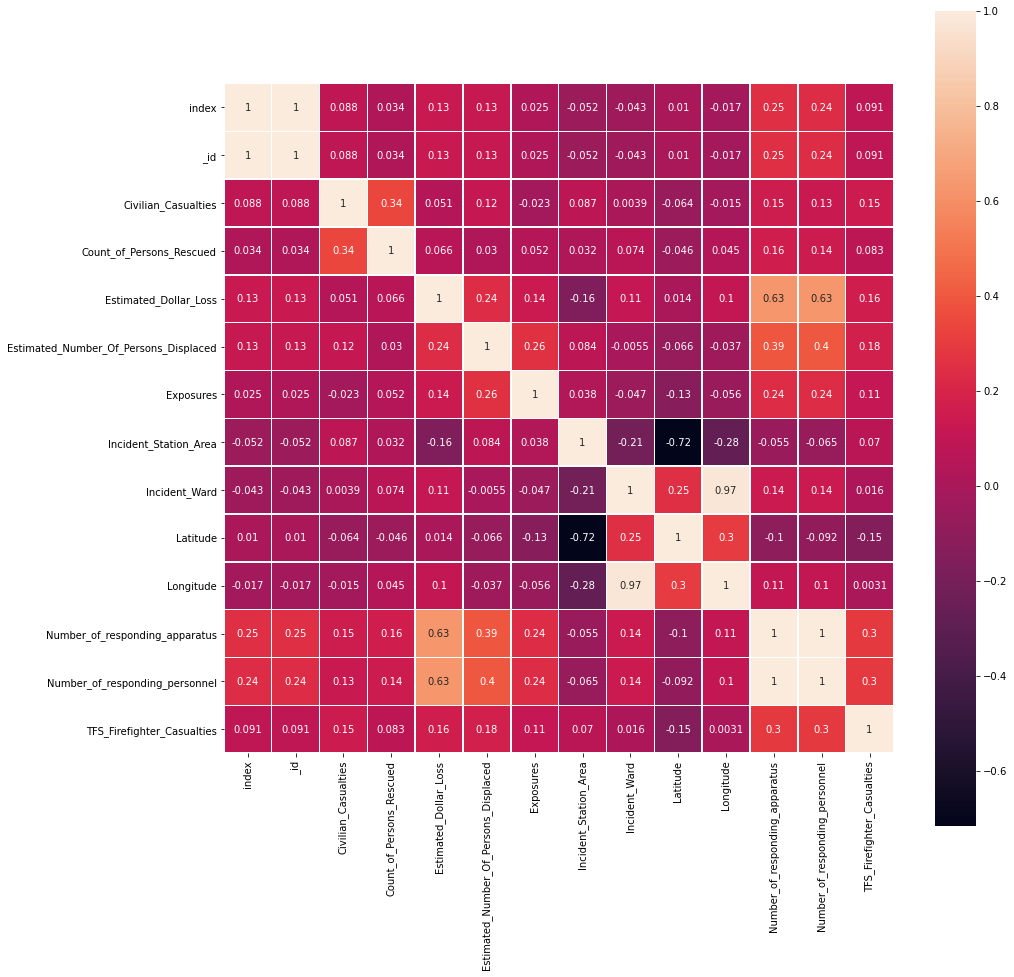

In [22]:
plt.subplots(figsize=(15,15))
sns.heatmap(ds.corr(), annot = True,annot_kws={'size': 10},linewidths=.5,square=True)

In [23]:
#ds['Final_Incident_Type'].unique()
Final_Incident_Type = ds.loc[:, ['Final_Incident_Type']].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Final_Incident_Type = le.fit_transform(Final_Incident_Type)
Final_Incident_Type = pd.DataFrame(Final_Incident_Type,columns = ['Final_Incident_Type(Explosion)'])
Final_Incident_Type

C:\Users\kalar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Final_Incident_Type(Explosion)
0,0
1,0
2,0
3,0
4,0
...,...
206,0
207,0
208,0
209,0


In [24]:
Method_Of_Fire_Control = pd.get_dummies(ds['Method_Of_Fire_Control'])
Method_Of_Fire_Control

,1 - Extinguished by fire department,3 - Extinguished by occupant,4 - Fire self extinguished,5 - Action taken unclassified
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
206,1,0,0,0
207,1,0,0,0
208,1,0,0,0
209,1,0,0,0


In [31]:
Method_Of_Fire_Control1 = ds.loc[:,['Method_Of_Fire_Control']].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(), [0])],remainder='passthrough')
Method_Of_Fire_Control1 = np.array(ct.fit_transform(Method_Of_Fire_Control1))
print(Method_Of_Fire_Control1)

  (0, 0)	1.0
  (1, 2)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 1)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (186, 0)	1.0
  (187, 0)	1.0
  (188, 0)	1.0
  (189, 0)	1.0
  (190, 0)	1.0
  (191, 3)	1.0
  (192, 0)	1.0
  (193, 0)	1.0
  (194, 0)	1.0
  (195, 0)	1.0
  (196, 0)	1.0
  (197, 0)	1.0
  (198, 0)	1.0
  (199, 0)	1.0
  (200, 0)	1.0
  (201, 0)	1.0
  (202, 0)	1.0
  (203, 0)	1.0
  (204, 0)	1.0
  (205, 0)	1.0
  (206, 0)	1.0
  (207, 0)	1.0
  (208, 0)	1.0
  (209, 0)	1.0
  (210, 0)	1.0


In [45]:
Method_Of_Fire_Control2 = ds.loc[:,['Method_Of_Fire_Control']].values
Method_Of_Fire_Control2 = Method_Of_Fire_Control2.ravel()
#print(Method_Of_Fire_Control2)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = CountVectorizer()
Method_Of_Fire_Control2 = vectorizer.fit_transform(Method_Of_Fire_Control2)
print(Method_Of_Fire_Control2)


  (0, 3)	1
  (0, 1)	1
  (0, 4)	1
  (0, 2)	1
  (1, 3)	1
  (1, 4)	1
  (1, 6)	1
  (2, 3)	1
  (2, 1)	1
  (2, 4)	1
  (2, 2)	1
  (3, 3)	1
  (3, 1)	1
  (3, 4)	1
  (3, 2)	1
  (4, 3)	1
  (4, 1)	1
  (4, 4)	1
  (4, 2)	1
  (5, 3)	1
  (5, 1)	1
  (5, 4)	1
  (5, 2)	1
  (6, 3)	1
  (6, 1)	1
  :	:
  (204, 2)	1
  (205, 3)	1
  (205, 1)	1
  (205, 4)	1
  (205, 2)	1
  (206, 3)	1
  (206, 1)	1
  (206, 4)	1
  (206, 2)	1
  (207, 3)	1
  (207, 1)	1
  (207, 4)	1
  (207, 2)	1
  (208, 3)	1
  (208, 1)	1
  (208, 4)	1
  (208, 2)	1
  (209, 3)	1
  (209, 1)	1
  (209, 4)	1
  (209, 2)	1
  (210, 3)	1
  (210, 1)	1
  (210, 4)	1
  (210, 2)	1


In [30]:
ds.drop(['Estimated_Dollar_Loss','Estimated_Number_Of_Persons_Displaced','Final_Incident_Type','Method_Of_Fire_Control'], axis='columns', inplace=True)

ds = ds.join([Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Method_Of_Fire_Control,Final_Incident_Type])
ds

,index,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Exposures,Ext_agent_app_or_defer_time,Extent_Of_Fire,...,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,1 - Extinguished by fire department,3 - Extinguished by occupant,4 - Fire self extinguished,5 - Action taken unclassified,Final_Incident_Type(Explosion)
0,964,191270,53 - Chimney/Flue Pipe,02 - Under Renovation,1 - No business interruption,0,0,1.0,2011-01-20T18:55:00,1 - Confined to object of origin,...,2011-01-20T18:48:55,2011-01-20T18:53:28,0,0.0,-0.467214,1,0,0,0,0
1,1049,191355,"12 - Hallway, Corridor",01 - Normal (no change),1 - No business interruption,0,0,1.0,2011-03-07T04:10:00,1 - Confined to object of origin,...,2011-03-07T03:23:57,2011-03-07T03:31:28,0,0.0,-0.471048,0,0,1,0,0
2,1195,191501,74 - Storage Area (outside),08 - Not Applicable,1 - No business interruption,0,0,3.0,2011-04-12T15:21:20,"11 - Spread beyond building of origin, resulte...",...,2011-04-12T15:14:34,2011-04-12T15:19:39,0,0.0,-0.460825,1,0,0,0,0
3,1246,191552,"73 - Parking Area, Parking Lot",01 - Normal (no change),1 - No business interruption,0,0,1.0,2011-04-29T02:58:00,"11 - Spread beyond building of origin, resulte...",...,2011-04-29T02:47:43,2011-04-29T02:52:11,0,0.0,-0.322387,1,0,0,0,0
4,1377,191683,24 - Cooking Area or Kitchen,01 - Normal (no change),8 - Not applicable (not a business),0,0,1.0,2011-05-23T22:42:00,"11 - Spread beyond building of origin, resulte...",...,2011-05-23T22:36:15,2011-05-23T22:40:42,0,0.0,-0.258493,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,12076,202382,79 - Other Outside Area,01 - Normal (no change),8 - Not applicable (not a business),0,0,2.0,2017-10-29T01:38:10,"11 - Spread beyond building of origin, resulte...",...,2017-10-29T01:28:23,2017-10-29T01:33:55,0,0.0,-0.301089,1,0,0,0,0
207,12144,202450,74 - Storage Area (outside),08 - Not Applicable,8 - Not applicable (not a business),0,0,2.0,2017-11-17T14:33:47,"11 - Spread beyond building of origin, resulte...",...,2017-11-17T14:24:08,2017-11-17T14:29:02,0,0.0,-0.466149,1,0,0,0,0
208,12201,202507,64 - Porch or Balcony,01 - Normal (no change),1 - No business interruption,0,0,1.0,2017-12-01T20:40:44,2 - Confined to part of room/area of origin,...,2017-12-01T20:34:06,2017-12-01T20:37:55,0,0.0,-0.454435,1,0,0,0,0
209,12314,202620,53 - Chimney/Flue Pipe,01 - Normal (no change),1 - No business interruption,0,0,1.0,2017-12-30T10:11:42,"11 - Spread beyond building of origin, resulte...",...,2017-12-30T10:05:14,2017-12-30T10:08:09,0,0.0,-0.450176,1,0,0,0,0


In [31]:
from sklearn import datasets
df = datasets.load_iris(as_frame=True)

X = df.data

In [32]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
selector.fit_transform(X)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3